<center><img width="460" height="300" src="https://upload.wikimedia.org/wikipedia/en/thumb/7/70/KAUST_Logo.svg/1200px-KAUST_Logo.svg.png"></center>
<h2><center>$$King~Abduallah~University~for~Science~and~Technology$$</center></h2>
<h2><center>$$\underline{\textbf{Course}}:~\color{Gold}{Geo-Environmental~Modeling}~\color{orange}{and}~\color{Turquoise}{Analysis}~(ErSE~316)$$</center></h2>
<h2><center>$$\underline{\textbf{Instructors:}}~\textbf{Hylke Beck} ~ \textbf{and} ~ \textbf{Yoshihide Wada} ~$$</center></h2>
<h2><center>$$\underline{\textbf{Student:}}~Sofien~Resifi$$</center></h2>
<h3><center>$$\underline{\textbf{Assignment~2}}$$</center></h3>

# Github Link
"https://github.com/resifis/geo_env/blob/main/Assignment2/"

# Needed Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb
import xarray as xr

# Part 1: Importing Climate Model Output

In [2]:
data_path = "tas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_195001-201412.nc"
dset = xr.open_dataset(data_path)
#pdb.set_trace()

# Part 2: Exploring the Data

 $\large \textbf{1. Inspect the contents of the netCDF file using dset.}$

In [3]:
#Exploring dset
dset

<xarray.Dataset> Size: 162MB
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 780)
Coordinates:
  * bnds       (bnds) float64 16B 1.0 2.0
    height     float64 8B ...
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 6kB 1950-01-16 12:00:00 ... 2014-12-16 12:00:00
Data variables:
    lat_bnds   (lat, bnds) float64 3kB ...
    lon_bnds   (lon, bnds) float64 5kB ...
    tas        (time, lat, lon) float32 162MB ...
    time_bnds  (time, bnds) object 12kB ...
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               Amon
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/a54fe2f4-0a68-4420-8702-36750bde9b05
    variable_id:            tas
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

$\large \textbf{2. Which variables does the netCDF contain? Execute the dset.keys() command to print
the names of the variables.}$

In [4]:
#Printing the name of the variables
dset.keys()

KeysView(<xarray.Dataset> Size: 162MB
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 780)
Coordinates:
  * bnds       (bnds) float64 16B 1.0 2.0
    height     float64 8B ...
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 6kB 1950-01-16 12:00:00 ... 2014-12-16 12:00:00
Data variables:
    lat_bnds   (lat, bnds) float64 3kB ...
    lon_bnds   (lon, bnds) float64 5kB ...
    tas        (time, lat, lon) float32 162MB ...
    time_bnds  (time, bnds) object 12kB ...
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               Amon
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
 

$\textbf{Description}:$ 

The netcdf dataset contains 5 $\textbf{coordinates}$ variables including: $\textbf{bnds}$, $\textbf{height}$, $\textbf{lon}$, $\textbf{lat}$, and $\textbf{time}$.

For the $\textbf{data variables}$, we have four variables named as follows:$\textbf{lat\_bnds}$, $\textbf{lon\_bnds}$, $\textbf{tas}$, and $\textbf{time\_bnds}$



$\Large \textbf{3. Access the air temperature variable using dset[’tas’]. }$
$\Large \textbf{What are the dimensions of the
air temperature variable?}$


In [5]:
#$\large \textbf{}$
dset["tas"]

<xarray.DataArray 'tas' (time: 780, lat: 180, lon: 288)> Size: 162MB
[40435200 values with dtype=float32]
Coordinates:
    height   float64 8B ...
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time     (time) object 6kB 1950-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    standard_name:  air_temperature
    interp_method:  conserve_order2
    original_name:  tas

In [6]:
print("dimension of the tas variable = ",dset["tas"].shape)

dimension of the tas variable =  (780, 180, 288)


$\textbf{Description:}$ The air temperature variable has three dimensions: The first dimension is the time dimension, while the second and the third dimension are latitude and longitude,respectively.

$\Large \textbf{4. What kind of data is this: raster, vector, or point?}$

$\textbf{Description:}$ The tas variable is a $\textbf{raster}$. More specifically, it is a 3d array, with the first dimension representing the $\textbf{temporal}$ dimension,and the second and third dimension represent the $\textbf{spatial}$ dimensions (latitude and longitude)

$\Large \textbf{5. What is the data type of the air temperature variable: integer, single, or double?}$
$\Large \textbf{Find out using the command dset[’tas’].dtype.}$

In [7]:
dset["tas"].dtype

dtype('float32')

$\textbf{Answer:}$ The tas variable in the netcdf file is a float data. More specifically it is a $\textbf{signle}$ precison float (float32)

$\Large \textbf{6. Is this the optimal data type for air temperature data?}$

$\textbf{Answer:}$ Yes, single precision float is the optimal data type for air temperature for two reasons. First, for the air temperature we are generally interested in the first four or five decimal digits. Second, single precision float for temperature is also better for memory efficiency.

$\Large \textbf{7. What is the temporal span of each netCDF file?}$

In [8]:
# Reading all the netcdf file
dset_1850_1950 = xr.open_dataset("tas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_185001-194912.nc")
dset_2015_2100_119 = xr.open_dataset("tas_Amon_GFDL-ESM4_ssp119_r1i1p1f1_gr1_201501-210012.nc")
dset_2015_2100_245 = xr.open_dataset("tas_Amon_GFDL-ESM4_ssp245_r1i1p1f1_gr1_201501-210012.nc")
dset_2015_2100_585 = xr.open_dataset("tas_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_201501-210012.nc")

In [9]:
print("-----------dset_1950_2015------------")
print("start time = ",dset.time.values[0])
print("end time = ",dset.time.values[-1])
print("-----------dset_1850_1950------------")
print("start time = ",dset_1850_1950.time.values[0])
print("end time = ",dset_1850_1950.time.values[-1])
print("-----------dset_2015_2100_119------------")
print("start time = ",dset_2015_2100_119.time.values[0])
print("end time = ",dset_2015_2100_119.time.values[-1])
print("-----------dset_2015_2100_245------------")
print("start time = ",dset_2015_2100_245.time.values[0])
print("end time = ",dset_2015_2100_245.time.values[-1])
print("-----------dset_2015_2100_585------------")
print("start time = ",dset_2015_2100_585.time.values[0])
print("end time = ",dset_2015_2100_585.time.values[-1])

-----------dset_1950_2015------------
start time =  1950-01-16 12:00:00
end time =  2014-12-16 12:00:00
-----------dset_1850_1950------------
start time =  1850-01-16 12:00:00
end time =  1949-12-16 12:00:00
-----------dset_2015_2100_119------------
start time =  2015-01-16 12:00:00
end time =  2100-12-16 12:00:00
-----------dset_2015_2100_245------------
start time =  2015-01-16 12:00:00
end time =  2100-12-16 12:00:00
-----------dset_2015_2100_585------------
start time =  2015-01-16 12:00:00
end time =  2100-12-16 12:00:00


$\textbf{Answer:}$ 

The $\textbf{Historical\_1950\_2015}$ dataset spans the period between $\textbf{1950-01-16 12:00:00}$ to $\textbf{2014-12-16 12:00:00}$

The $\textbf{Historical\_1850\_1950}$ dataset spans the period between $\textbf{1850-01-16 12:00:00}$ to $\textbf{1949-12-16 12:00:00}$

The $\textbf{Projection\_119}$ dataset spans the period between $\textbf{2015-01-16 12:00:00}$ to $\textbf{2100-12-16 12:00:00}$

The $\textbf{Projection\_245}$ dataset spans the period between $\textbf{2015-01-16 12:00:00}$ to $\textbf{2100-12-16 12:00:00}$

The $\textbf{Projection\_585}$ dataset spans the period between $\textbf{2015-01-16 12:00:00}$ to $\textbf{2100-12-16 12:00:00}$

$\Large \textbf{8. What are the units of the air temperature data?}$

$\textbf{Answer:}$ The air temperature is expressed in Kelvin (K)

$\Large \textbf{9- What is the spatial and temporal resolution of the air temperature data?}$

$\textbf{Answer:}$ The spatial resolution of the data is around 1$^\circ$ $\times$ 1.2$^\circ$ (Latitude $\times$ Longitude). From the time dimension in the datasets we can see that the temporal resolution of the data is $\textbf{montlhy}$.

$\Large \textbf{10. What is the spatial projection of the air temperature data?}$

$\textbf{Answer}$ Based on the lecture 1 slides (slide 47 and 48) and the visualization in part 3, the spatial projection of the air temperature data is a $\textbf{cylindrical}$.

$\Large \textbf{11. What is the meaning of ssp in the file names?}$

$\textbf{Answer:}$ SSP referes to $\textbf{S}$hared $\textbf{S}$ocioeconomic $\textbf{P}$athways which represents the projection of the climate based different possible future socio-economic developments scenarios and their impacts on greenhouse gas emissions.

$\Large \textbf{12. What type of model does the data originate from:}$
$\Large \textbf{physically-based, conceptual, datadriven, hybrid, or other?}$

$\textbf{Answer:}$ The data originate from a $\textbf{physics-based}$ models. These models are based on fundamental physical laws such as thermodynamics, fluid dynamics, and radiation transfer. These physical models simulate climate systems by solving differential equations.

# Part 3: Creation of Climate Change Maps

$\Large \textbf{1. Calculate the mean air temperature map for 1850–1900}$
$\Large \textbf{(also known as the pre-industrialperiod)}$

In [10]:
mean_1850_1900 = np.mean(dset_1850_1950['tas'].sel(time=slice('18500101','19001231')), axis=0)
#convert the data into a numpy array.
mean_1850_1900 = np.array(mean_1850_1900)

In [11]:
print("Data type = ",mean_1850_1900.dtype)
print("Data shape = ",mean_1850_1900.shape)

Data type =  float32
Data shape =  (180, 288)


$\textbf{Answer:}$ The data type is $\textbf{single}$ precison float and the data shape is $\textbf{(180, 288)}$

$\Large \textbf{2. Calculate mean air temperature maps for 2071–2100 for each climate scenario.}$
$\Large \textbf{Write the necessary code on your own.}$

In [12]:
#computing the mean for each projection scenario.
mean_2071_2100_119 = np.mean(dset_2015_2100_119['tas'].sel(time=slice('20710101','21001231')), axis=0) 
mean_2071_2100_245 = np.mean(dset_2015_2100_245['tas'].sel(time=slice('20710101','21001231')), axis=0)  
mean_2071_2100_585 = np.mean(dset_2015_2100_585['tas'].sel(time=slice('20710101','21001231')), axis=0)

#converting all means to a numpy arrays
mean_2071_2100_119 = np.array(mean_2071_2100_119)
mean_2071_2100_245 = np.array(mean_2071_2100_245)
mean_2071_2100_585 = np.array(mean_2071_2100_585)

$\Large \textbf{3. Compute and visualize the temperature differences between 2071–2100 and 1850–1900}$
$\Large \textbf{for each scenario.}$

In [13]:
# Get latitude and longitude values for the plots
lat = dset_1850_1950.lat.values
lon = dset_1850_1950.lon.values

In [14]:
#Compute the difference between historical temperature and climate projections for each scenario
diff_119 = mean_2071_2100_119 - mean_1850_1900
diff_245 =  mean_2071_2100_245 - mean_1850_1900
diff_585 = mean_2071_2100_585 - mean_1850_1900
#colorbar adjustement (Normalization of the colorbars).
v_min = min(np.min(diff_119),np.min(diff_245),np.min(diff_585))
v_max = max(np.max(diff_119),np.max(diff_245),np.max(diff_585))
v_ = max(abs(v_min),abs(v_max))
v_min = -v_ + v_//3
v_max = v_ -v_//3

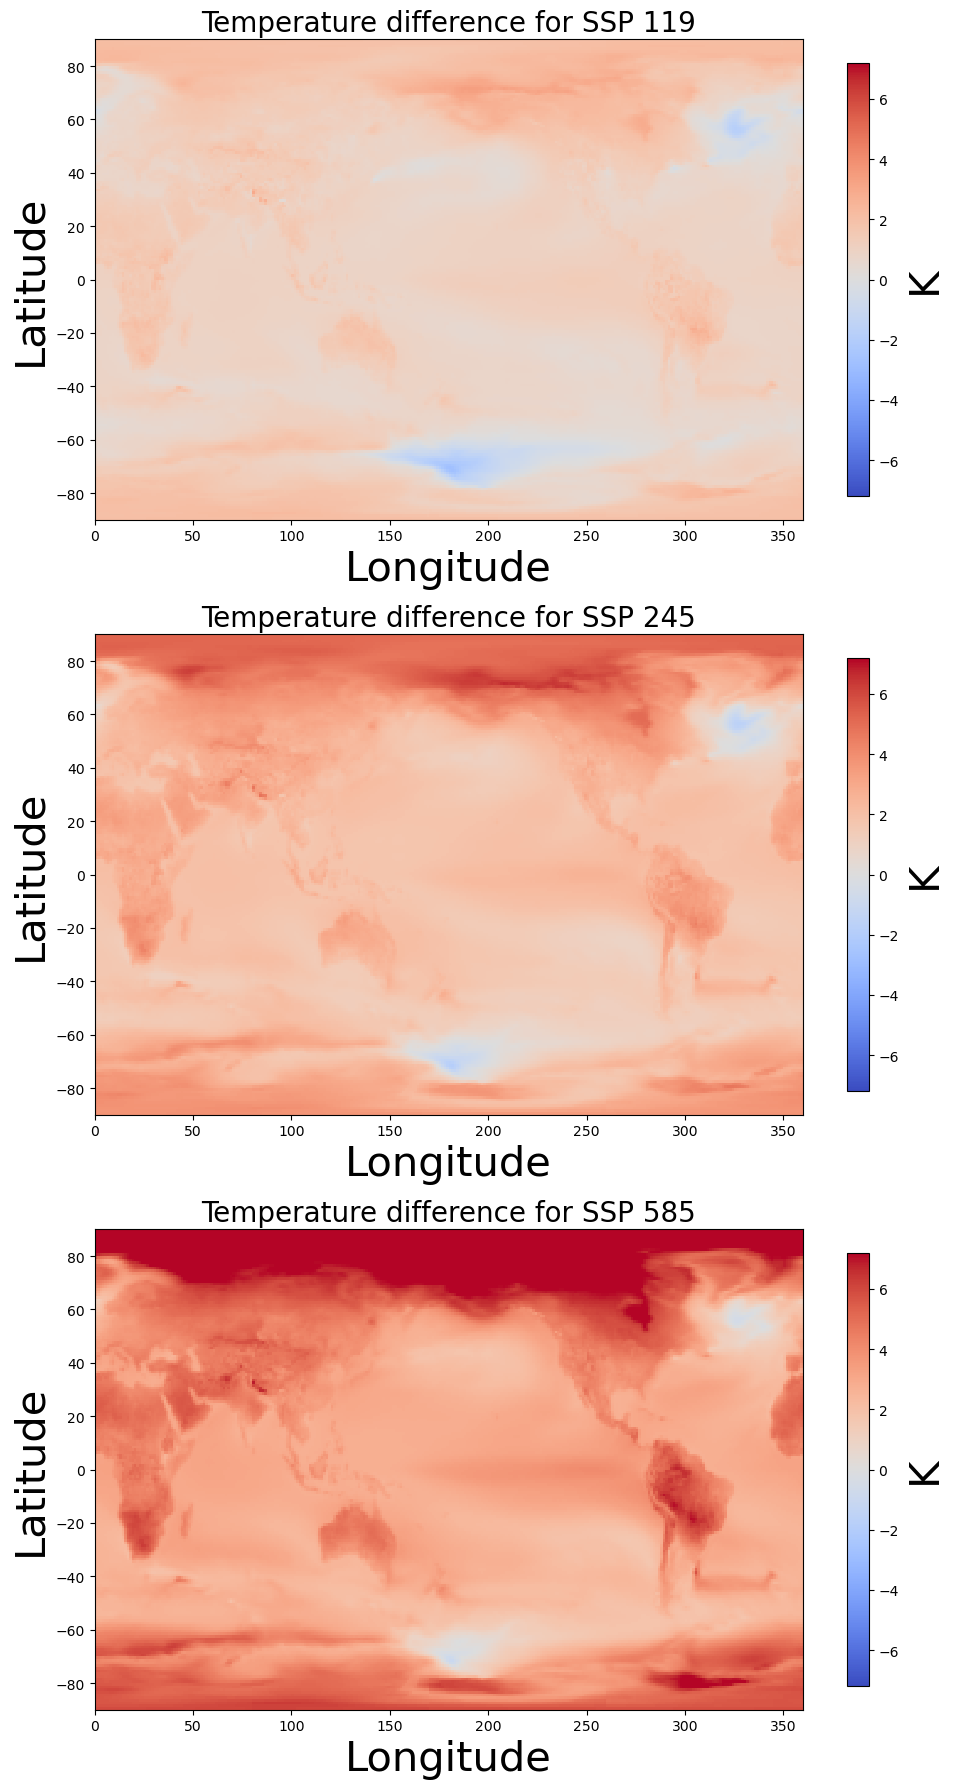

In [32]:
#generate the figures for the temperature differences for eachs scenario
plt.figure(figsize = (10,18))
plt.subplot(311)
plt.title("Temperature difference for SSP 119",fontsize = 20)
plt.pcolormesh(lon,lat,diff_119,cmap = "coolwarm",vmin = v_min,vmax = v_max)
plt.xlabel("Longitude",fontsize = 30)
plt.ylabel("Latitude",fontsize = 30)
cbar = plt.colorbar(shrink = 0.9)
cbar.set_label("K",fontsize = 30)
plt.subplot(312)
plt.title("Temperature difference for SSP 245",fontsize = 20)
plt.ylabel("Latitude",fontsize = 30)
plt.pcolormesh(lon,lat,diff_245,cmap = "coolwarm",vmin = v_min,vmax = v_max)
cbar = plt.colorbar(shrink = 0.9)
cbar.set_label("K",fontsize = 30)
plt.xlabel("Longitude",fontsize = 30)
plt.subplot(313)
plt.title("Temperature difference for SSP 585",fontsize = 20)
plt.ylabel("Latitude",fontsize = 30)
plt.pcolormesh(lon,lat,diff_585,cmap = "coolwarm",vmin = v_min,vmax = v_max)
cbar = plt.colorbar(shrink = 0.9)
cbar.set_label("K",fontsize = 30)
plt.xlabel("Longitude",fontsize = 30)
plt.tight_layout()
plt.savefig("Difference_change.png",dpi = 300)

$\Large \textbf{5. Based on Figure 2 of Beck et al. 2023,}$
$\Large \textbf{would you categorize your climate change projections as}$
$\Large \textbf{being on the hot end, the cold end, or relatively moderate?}$


$\textbf{Answer:}$ For the scenario $\textbf{119}$ it is considered on the $\textbf{cold end}$ as the mean difference change is around 1.14 K, while the scenario $\textbf{245}$ is considerend a $\textbf{relatively moderate}$ with a mean difference change of 2.5 K. Finally the scenario $\textbf{585}$ is considered on the $\textbf{hot end}$ with a mean difference change of 4.02 K.

In [26]:
print("Mean difference change for scenario 119 = ",diff_119.mean())
print("Mean difference change for scenario 245 = ",diff_245.mean())
print("Mean difference change for scenario 585 = ",diff_585.mean())

Mean difference change for scenario 119 =  1.1416554
Mean difference change for scenario 245 =  2.5029812
Mean difference change for scenario 585 =  4.027253


$\Large \textbf{6. Can you propose some way to generate more reliable climate change projections?}$

$\textbf{Answer:}$ In order to get more reliable climate change projections, we need first to put more realistic climate change scenarios based on the green house gas emissions. Moreover, we need to improve the physical models in order properly capture the general trends of the meteorological variables by enhancing the physics within the models and improving the parameterization schemes. We need to make the physical models more efficient in a way that we can generate a higher resolution simulation which can capture the small scale dynamics that leads to a better representation of the climate. Furthermore, developing/improving tools for uncertainty quantification may lead to a better interpretability of the climate and a better understanding of its outcome.